# Twitter Sentiment Analysis

## Introduction to Sentiment Analysis

- Sentiment analysis, also known as opinion mining, is a branch of natural language processing (NLP) focused on analyzing and categorizing text based on the sentiment expressed within it.

- The primary objective of sentiment analysis is to determine the polarity of a piece of text, classifying it as positive, negative, or neutral based on the opinions, attitudes, and emotions conveyed.

- This NLP technique finds wide applications in various domains, including social media monitoring, customer feedback analysis, market research, brand reputation management, and political analysis.

- By leveraging sentiment analysis, businesses can gain insights into customer satisfaction levels, identify emerging trends, assess public perception of products or services, and tailor marketing strategies accordingly.

- Sentiment analysis algorithms utilize machine learning and statistical techniques to process and classify textual data, often employing techniques such as lexicon-based analysis, machine learning classifiers (e.g., Support Vector Machines, Naive Bayes), and deep learning models (e.g., recurrent neural networks, transformers).

- The increasing availability of large-scale textual data and advancements in NLP technologies have propelled sentiment analysis to become a crucial tool for understanding and responding to the sentiments expressed within vast amounts of text data generated online and offline.

## Understanding the Problem Statement

**Problem Statement:**
In today's digital age, the proliferation of social media platforms has provided individuals with a powerful medium to express their opinions, sentiments, and emotions on a wide range of topics. With the immense volume of text data generated daily on platforms like **Twitter**, understanding the sentiments expressed within this data has become increasingly challenging yet crucial for businesses, organizations, and researchers. **Sentiment analysis**, also known as opinion mining, addresses this challenge by providing automated methods to analyze and classify text data based on the sentiments expressed within it.

**Objectives:**
- Develop a sentiment analysis model specifically tailored to analyze **Twitter** data.
- Leverage natural language processing (NLP) techniques and machine learning algorithms to classify tweets into distinct sentiment categories: **positive**, **negative**, or **neutral**.
- Gain insights into public opinion, sentiment trends, and the overall sentiment landscape surrounding specific topics, events, or entities discussed on **Twitter**.
- Enable businesses, marketers, policymakers, and researchers to make data-driven decisions, monitor brand perception, understand customer feedback, and respond effectively to sentiment shifts in real-time.
- Demonstrate the practical applications of sentiment analysis in harnessing the wealth of information available on social media platforms like **Twitter** to derive actionable insights and drive informed decision-making.

## Overview of the Project

This project is about the analysis of tweets, with the goal of performing a Sentiment Analysis using RoBERTa algorithm to predict the emotion of a tweet (Positive, Negative or Neutral). In particular, RoBERTa will be fine tuned using the given dataset in order to improve the model's overall performance.

Before feeding the data to the algorithm, the tweets will be deeply cleaned to remove links, hashtags at the end of the sentences and punctuation to allow the algorithm to better understand the text and improve the prediction performance.

**Dataset:** https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

## Project Development

### Importing necessary modules

In [ ]:
!pip install --upgrade tensorflow transformers

import warnings
warnings.filterwarnings("ignore")

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.1
    Uninstalling tensorflow-2.15.1:
      Successfully uninstalled tensorflow-2.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
!pip list | grep "tensorflow\|transformers"

tensorflow                       2.16.1
tensorflow-datasets              4.9.4
tensorflow-estimator             2.15.0
tensorflow-gcs-config            2.15.0
tensorflow-hub                   0.16.1
tensorflow-io-gcs-filesystem     0.36.0
tensorflow-metadata              1.14.0
tensorflow-probability           0.23.0
transformers                     4.39.2


### 1. Loading the Data

This module focuses on gathering Twitter data relevant to the sentiment analysis task and exploring it.

In [ ]:
# Import pandas for reading the csv file
import pandas as pd

# Read the training and testing data from CSV files
tweets_train = pd.read_csv('train.csv', encoding='ISO-8859-1')
tweets_test = pd.read_csv('test.csv')

# Print the first few rows of the training and testing data
print(f"Training Data:\n {tweets_train.head()}\n\n")
print(f"Testing Data:\n {tweets_test.head()}")

Training Data:
    id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


Testing Data:
       id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [ ]:
# Print the shape of the training data
print(f"Training Data: {tweets_train.shape}")

# Print the shape of the testing data
print(f"\nTesting Data: {tweets_test.shape}")

Training Data: (31962, 3)

Testing Data: (17197, 2)


In [ ]:
# Display information about the training data
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


* 0==Positive Data
* 1==Racist or Sexist Data

### 2. Data Preprocessing

#### Changing column labels

In [ ]:
# Drop the "id" column from the training data
tweets_train = tweets_train.drop(["id"], axis=1)

# Reorder the columns in the training data
new_column_order = ["tweet", "label"]
tweets_train = tweets_train[new_column_order]

# Reindex the columns in the training data
tweets_train = tweets_train.reindex(columns=new_column_order)
tweets_train.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


#### Checking for duplicates

In [ ]:
# Remove duplicate rows based on the 'tweet' column in the training data
tweets_train.drop_duplicates(subset='tweet', inplace=True)

In [ ]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29530 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   29530 non-null  object
 1   label   29530 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 692.1+ KB


#### Checking for null values

In [ ]:
tweets_train.isnull().sum()

tweet    0
label    0
dtype: int64

As there are no null values, we can proceed with visualization of data

In [ ]:
tweets_train['label'].value_counts()

0    27517
1     2013
Name: label, dtype: int64

#### Visualization of different categories of tweets

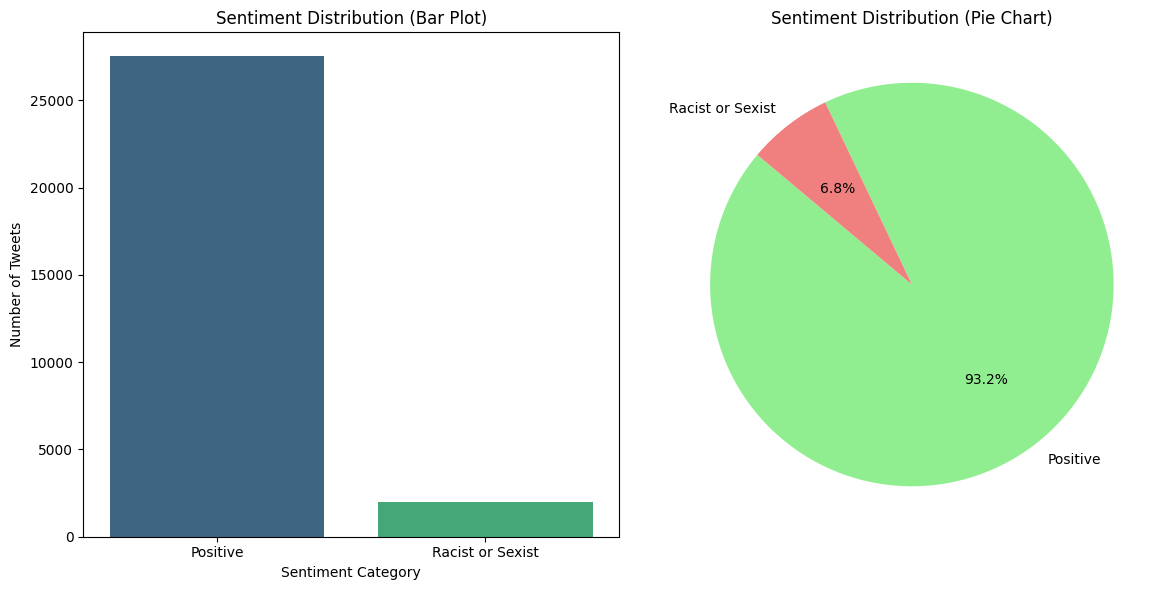

In [ ]:
# Importing libraries needed for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping numerical values to sentiment labels
sentiment_labels = {0: 'Positive', 1: 'Racist or Sexist'}
tweets_train['sentiment_label'] = tweets_train['label'].map(sentiment_labels)

# Group the data by sentiment label and count the number of occurrences of each label
sentiment_counts = tweets_train['sentiment_label'].value_counts()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes[0], palette="viridis")
axes[0].set_title('Sentiment Distribution (Bar Plot)')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Number of Tweets')
axes[0].tick_params(axis='x', rotation=0)

# Plotting the pie chart
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[1].set_title('Sentiment Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

The output of the visualization provides an insightful comparison of sentiment distribution in the Twitter dataset. The bar plot showcases the absolute count of tweets categorized as positive, and racist or sexist sentiments, while the pie chart presents the proportion of each sentiment category in the dataset, enabling a clear understanding of the overall sentiment distribution.

#### Visualization of tweet length vs sentiment of tweet

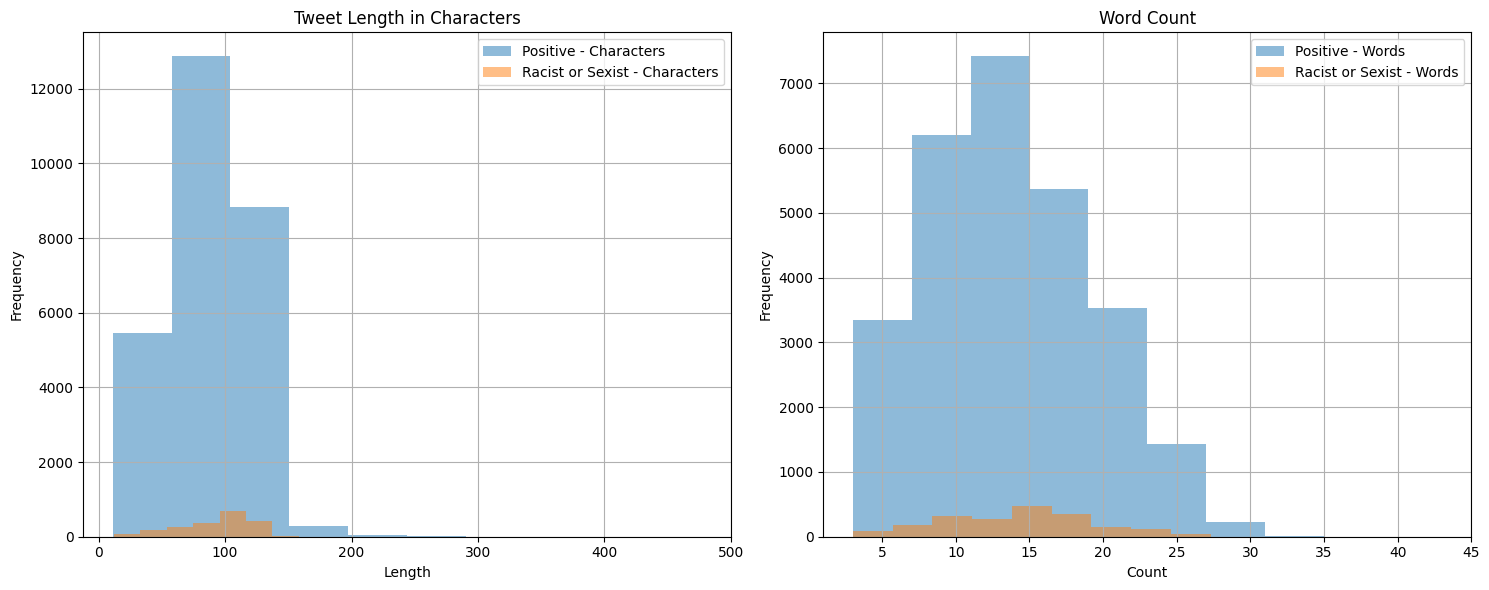

In [ ]:
# Calculate the length of each tweet (number of characters or words)
tweets_train['tweet_length'] = tweets_train['tweet'].apply(len)
# Split each tweet into words and calculate the length of each word
tweets_train['word_count'] = tweets_train['tweet'].apply(lambda x: len(x.split()))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting histogram for tweet lengths in characters
for sentiment_category in sentiment_labels.values():
    axes[0].hist(tweets_train[tweets_train['sentiment_label'] == sentiment_category]['tweet_length'], alpha=0.5, label=f'{sentiment_category} - Characters')

# Set title and labels for the first subplot
axes[0].set_title('Tweet Length in Characters')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Plotting histogram for word counts
for sentiment_category in sentiment_labels.values():
    axes[1].hist(tweets_train[tweets_train['sentiment_label'] == sentiment_category]['word_count'], alpha=0.5, label=f'{sentiment_category} - Words')

# Set title and labels for the second subplot
axes[1].set_title('Word Count')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

The output of this visualization provides an insightful comparison of tweet length distributions across different sentiment categories. Each histogram represents the frequency distribution of tweet lengths for a specific sentiment category (positive and racist or sexit). The plot enables the observation of potential differences or patterns in tweet lengths corresponding to different sentiment categories, aiding in the analysis of tweet characteristics in the dataset.

### 3. Tweets Deep Cleaning

In the following code, I'll perform some data cleaning on the raw text of the tweets and create a new column, to host the cleaned version of the tweets' text.

In [ ]:
tweets_train.head()

,tweet,label,sentiment_label,tweet_length,word_count
0,@user when a father is dysfunctional and is s...,0,Positive,102,18
1,@user @user thanks for #lyft credit i can't us...,0,Positive,122,19
2,bihday your majesty,0,Positive,21,3
3,#model i love u take with u all the time in ...,0,Positive,118,14
4,factsguide: society now #motivation,0,Positive,39,4


In [ ]:
# Import the necessary modules
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_text(tweet):
    """
    Clean and preprocess the text of a tweet.

    This function performs several text cleaning and preprocessing steps,
    including removing mentions, non-alphabetic characters, converting to lowercase,
    removing stopwords, and lemmatizing.

    Parameters:
    tweet (str): The input tweet text.

    Returns:
    str: The cleaned and preprocessed tweet text.
    """
    # Remove mentions
    tweets = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove non-alphabetic characters
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)

    # Convert to lowercase
    tweets = tweets.lower()

    # Tokenize the text
    tweets = tweets.split()

    # Remove stopwords
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]

    # Lemmatize the words
    lemma = WordNetLemmatizer()
    tweets = [lemma.lemmatize(word) for word in tweets]

    # Join the words back into a single string
    tweets = " ".join(tweets)

    return tweets

In [ ]:
# Apply the clean_text function to the 'tweet' column and create a new column 'cleaned_tweets'
tweets_train['cleaned_tweets'] = tweets_train['tweet'].apply(clean_text)

tweets_train.head()

,tweet,label,sentiment_label,tweet_length,word_count,cleaned_tweets
0,@user when a father is dysfunctional and is s...,0,Positive,102,18,father dysfunctional selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,0,Positive,122,19,thanks lyft credit use cause offer wheelchair ...
2,bihday your majesty,0,Positive,21,3,bihday majesty
3,#model i love u take with u all the time in ...,0,Positive,118,14,model love u take u time ur
4,factsguide: society now #motivation,0,Positive,39,4,factsguide society motivation


#### Visualization of Word Cloud of different setiments of tweets

In [ ]:
pip install wordcloud

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

stopword = set(STOPWORDS)
wordcloud_mask=np.array(Image.open("twitter.png"))

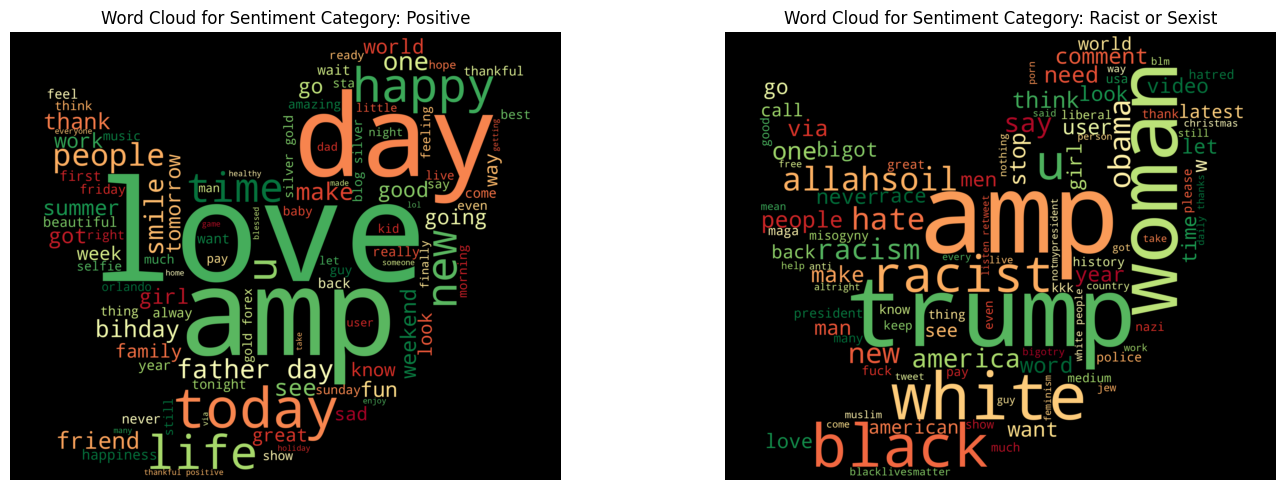

In [ ]:
# Create a function to generate word clouds for each sentiment category
def generate_wordcloud(sentiment_category, ax):
    # Filter the dataset by sentiment category
    tweets_category = tweets_train[tweets_train['sentiment_label'] == sentiment_category]

    # Concatenate all the text data (tweets) corresponding to the sentiment category
    text = ' '.join(tweets_category['cleaned_tweets'])

    # Generate word cloud
    wordcloud=WordCloud(stopwords=stopword, width=1600, height=800, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(text)

    # Plot word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Word Cloud for Sentiment Category: ' + str(sentiment_category))
    ax.axis('off')

# Create subplots with only two axes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Generate word clouds for each sentiment category
for i, sentiment_category in enumerate(['Positive', 'Racist or Sexist']):
    generate_wordcloud(sentiment_category, axes[i])

# Tighten the layout
plt.tight_layout()

# Show the plots
plt.show()

Moreover, I will also create a column to host the length of the cleaned tweets, to check if by cleaning the tweet I've removed too much text or almost entirely the tweet!

#### Dropping Tweets with less than 5 words

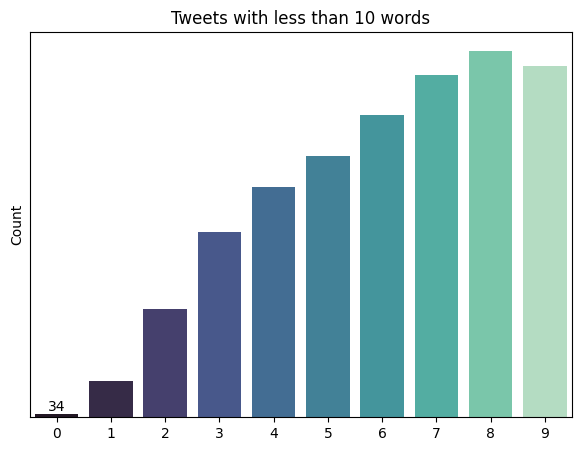

In [ ]:
# Calculate the length of each cleaned tweet in terms of words
text_len = []
for text in tweets_train['cleaned_tweets']:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

# Create a new column 'cleaned_tweet_len' containing the length of cleaned tweets
tweets_train['cleaned_tweet_len'] = text_len

# Plot the count of tweets with less than 10 words
plt.figure(figsize=(7,5))
ax = sns.countplot(x='cleaned_tweet_len', data=tweets_train[tweets_train['cleaned_tweet_len'] < 10], palette='mako')
plt.title('Tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()

As we can see, there are few tweets of cleaned tweets with 0 words: this is due to the cleaning performed before. This means that some tweets contained only mentions, hashtags and links, which have been removed. So, I will drop these empty tweets and also those with less than 5 words.

In [ ]:
# Print the shape of the original data
print(f"Original Data Shape: {tweets_train.shape}")

# Filter out tweets with less than or equal to 4 words and update the DataFrame
tweets_train = tweets_train[tweets_train['cleaned_tweet_len'] > 4]

# Print the shape of the filtered data
print(f"Filtered Data Shape: {tweets_train.shape}")

Original Data Shape: (29530, 7)
Filtered Data Shape: (24308, 7)


#### Extracting Hashtag Words

In [ ]:
# Initialize WordNetLemmatizer
lemma = WordNetLemmatizer()

def extract_hashtag(tweet):
    """
    Extract hashtags from a tweet and lemmatize them.

    This function extracts hashtags from a tweet, lemmatizes the words,
    and returns them as a single string.

    Parameters:
    tweet (str): The input tweet text.

    Returns:
    str: Extracted and lemmatized hashtags.
    """
    # Filter and extract hashtags from the tweet
    hashtags = " ".join(filter(lambda x: x[0] == '#', tweet.split()))

    # Remove non-alphabetic characters
    hashtags = re.sub('[^a-zA-Z]', ' ', hashtags)

    # Convert to lowercase
    hashtags = hashtags.lower()

    # Lemmatize the words
    hashtags = [lemma.lemmatize(word) for word in hashtags.split()]

    # Join the words back into a single string
    hashtags = "".join(hashtags)

    return hashtags

In [ ]:
tweets_train['word_with_hashtag'] = tweets_train.tweet.apply(extract_hashtag)
tweets_train.head()

,tweet,label,sentiment_label,tweet_length,word_count,cleaned_tweets,cleaned_tweet_len,word_with_hashtag
0,@user when a father is dysfunctional and is s...,0,Positive,102,18,father dysfunctional selfish drag kid dysfunct...,7,run
1,@user @user thanks for #lyft credit i can't us...,0,Positive,122,19,thanks lyft credit use cause offer wheelchair ...,11,lyftdisapointedgetthanked
3,#model i love u take with u all the time in ...,0,Positive,118,14,model love u take u time ur,7,model
5,[2/2] huge fan fare and big talking before the...,0,Positive,116,19,huge fan fare big talking leave chaos pay disp...,11,allshowandnogo
7,the next school year is the year for exams.Ã°Â...,0,Positive,151,21,next school year year exam think school exam h...,13,schoolexamhateimagineactorsliferevolutionschoo...


In [ ]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24308 entries, 0 to 31959
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet              24308 non-null  object
 1   label              24308 non-null  int64 
 2   sentiment_label    24308 non-null  object
 3   tweet_length       24308 non-null  int64 
 4   word_count         24308 non-null  int64 
 5   cleaned_tweets     24308 non-null  object
 6   cleaned_tweet_len  24308 non-null  int64 
 7   word_with_hashtag  24308 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


#### Most Common Hashtags in Positive Tweets

In [ ]:
# Import necessary library
from nltk.probability import FreqDist
import seaborn as sns

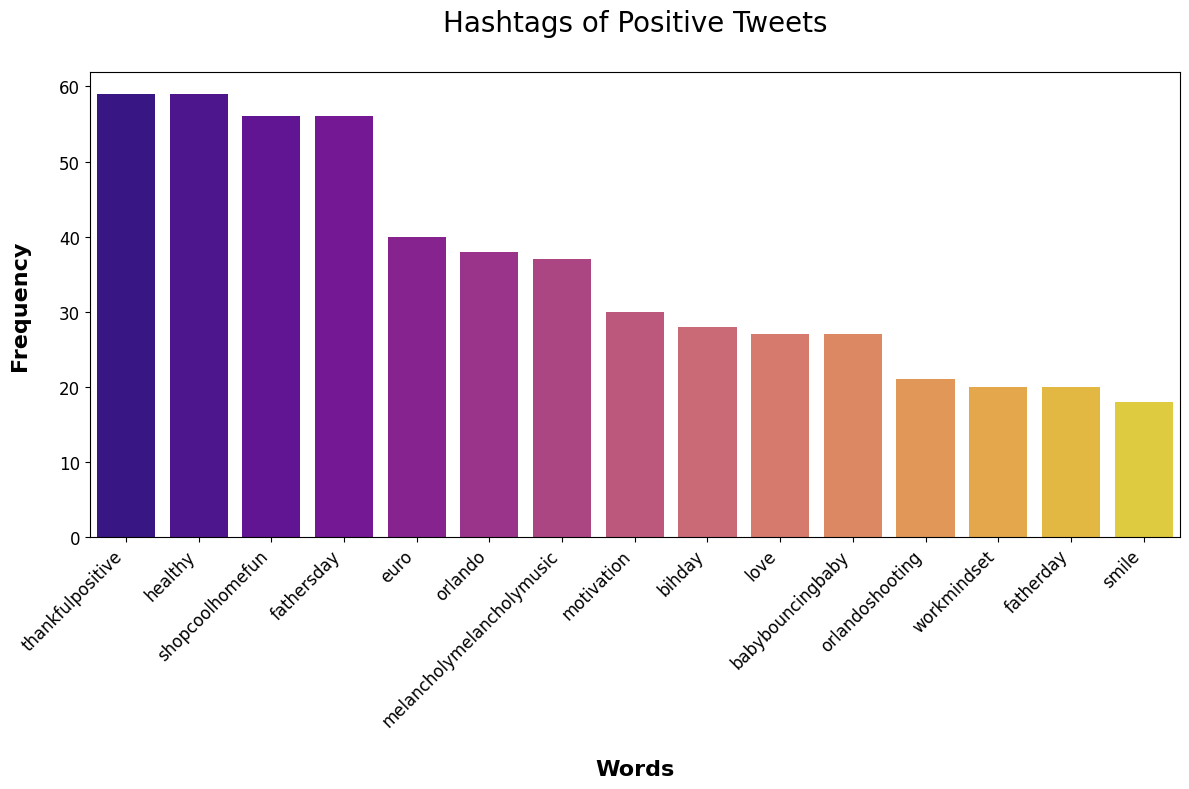

In [ ]:
# Calculate the frequency of hashtags in positive tweets
positive_hashtag = FreqDist(list(" ".join(tweets_train[tweets_train['label'] == 0]['word_with_hashtag']).split())).most_common(15)

# Create a DataFrame from the positive hashtag frequency data
positive_data = pd.DataFrame(positive_hashtag, columns=['words', 'frequency'])

# Set the color palette
colors = sns.color_palette("muted")

# Plot the barplot for positive hashtags using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='words', y="frequency", data=positive_data, palette='plasma')

plt.title('Hashtags of Positive Tweets\n', fontsize=20, color="black")
plt.xlabel("\nWords", fontsize=16, color="black", fontweight='bold')
plt.ylabel("Frequency\n", fontsize=16, color="black", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Most Common Hashtags in Racist or Sexist Tweets

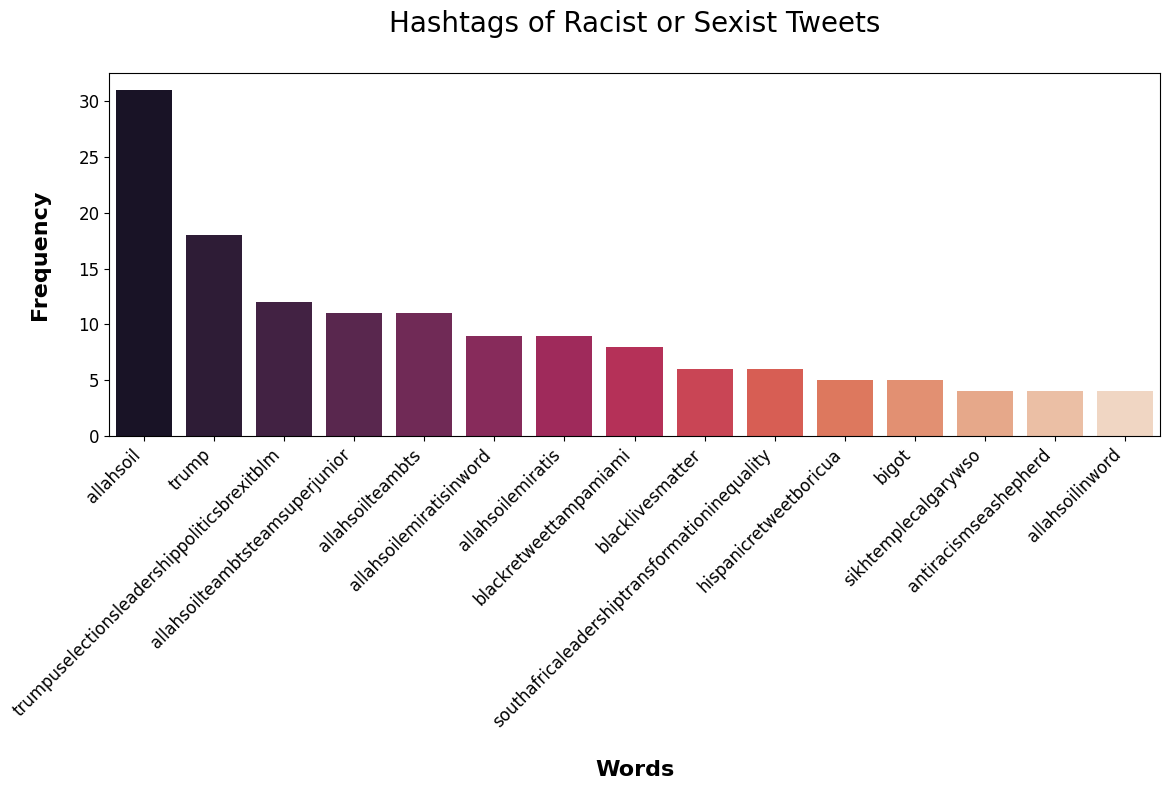

In [ ]:
# Calculate the frequency of hashtags in racist or sexist tweets
racist_sexist_hashtag = FreqDist(list(" ".join(tweets_train[tweets_train['label'] == 1]['word_with_hashtag']).split())).most_common(15)

# Create a DataFrame from the hashtag frequency data for racist or sexist tweets
racist_sexist_data = pd.DataFrame(racist_sexist_hashtag, columns=['words', 'frequency'])

# Plot the barplot for hashtags in racist or sexist tweets using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='words', y="frequency", data=racist_sexist_data, palette='rocket')

plt.title('Hashtags of Racist or Sexist Tweets\n', fontsize=20, color="black")
plt.xlabel("\nWords", fontsize=16, color="black", fontweight='bold')
plt.ylabel("Frequency\n", fontsize=16, color="black", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### 4. RoBERTa Tokenizer

In [ ]:
tweets_train=tweets_train.drop(["tweet","sentiment_label", "tweet_length", "word_count", "cleaned_tweet_len", "word_with_hashtag"], axis=1)

In [ ]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24308 entries, 0 to 31959
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           24308 non-null  int64 
 1   cleaned_tweets  24308 non-null  object
dtypes: int64(1), object(1)
memory usage: 569.7+ KB


In [ ]:
pip install tensorflow

In [ ]:
pip install tf-keras

  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [ ]:
from transformers import RobertaTokenizer
from transformers import TFRobertaModel

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [ ]:
roberta_model = TFRobertaModel.from_pretrained("roberta-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
# Extracting cleaned tweet data and label data from the tweets_train DataFrame
text_data = tweets_train["cleaned_tweets"]  # Extracting cleaned tweet data
label_data = tweets_train["label"]  # Extracting label data

# Converting label data to NumPy array for further processing
label_data = np.array(label_data)

In [ ]:
def roberta_encode(text_data, max_len):
    """
    Encode the text data using the RoBERTa tokenizer.

    Args:
    text_data (list): List of cleaned tweet texts.
    max_len (int): Maximum sequence length.

    Returns:
    input_ids (numpy.ndarray): Encoded input IDs.
    attention_masks (numpy.ndarray): Attention masks.
    """
    input_ids = []
    attention_masks = []

    # Encode each text in the text_data list
    for text in text_data:
        # Encode the text using the RoBERTa tokenizer
        encode_data = roberta_tokenizer.encode_plus(text, add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)

        # Append the encoded input IDs and attention masks
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)

In [ ]:
max_len = 128  # Maximum sequence length

# Encode the cleaned tweet texts using the RoBERTa tokenizer
text_input_ids, text_attention_masks = roberta_encode(text_data, max_len)

print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape, text_attention_masks.shape, label_data.shape))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text Input Ids Shape (24308, 128) 
Text Input Attention Mask Shape (24308, 128) 
Label Data shape (24308,)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# X_train_input: Input IDs for the training set
# X_test_input: Input IDs for the testing set
# Y_train_label: Labels for the training set
# Y_test_label: Labels for the testing set
# train_mask: Attention masks for the training set
# test_mask: Attention masks for the testing set
X_train_input, X_test_input, Y_train_label, Y_test_label, train_mask, test_mask = train_test_split(
    text_input_ids,  # Input IDs
    label_data,      # Labels
    text_attention_masks,  # Attention masks
    test_size=0.2,   # Fraction of the dataset to include in the testing set
    random_state=42,  # Random seed for reproducibility
    shuffle=True     # Shuffle the data before splitting
)

In [ ]:
# Print statements to display the shapes of different arrays
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(
    X_train_input.shape,  # Shape of the input IDs for the training set
    X_test_input.shape,   # Shape of the input IDs for the testing set
    Y_train_label.shape,  # Shape of the labels for the training set
    Y_test_label.shape,   # Shape of the labels for the testing set
    train_mask.shape,     # Shape of the attention masks for the training set
    test_mask.shape       # Shape of the attention masks for the testing set
))

Train input shape (19446, 128)
Test input shape (4862, 128)
Train label shape (19446,)
Test label shape (4862,)
Train attention mask shape (19446, 128)
Test attention mask shape (4862, 128)


### 5. Creating RoBERTa Model

#### Model Training

In [ ]:
# Importing tensorflow library
import tensorflow as tf

In [ ]:
def Create_Roberta_Model():
    # Define input layers for input IDs and attention masks
    input_ids = tf.keras.Input(shape=(max_len,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(max_len,), dtype="int32")

    # Get the output from RoBERTa model and select only the first token's output
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:, 0, :]

    # Add a dense layer with ReLU activation
    dense_layer = tf.keras.layers.Dense(128, activation="relu")(output_dim)

    # Add dropout layer for regularization
    dropout = tf.keras.layers.Dropout(0.5)(dense_layer)

    # Add final dense layer with softmax activation for classification
    final_layer = tf.keras.layers.Dense(2, activation='softmax')(dropout)

    # Define the model with inputs and outputs
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)

    return model

In [ ]:
# Create the RoBERTa-based model
model = Create_Roberta_Model()

# Define the loss function (Sparse Categorical Crossentropy)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Define the optimizer (Adam optimizer with a learning rate of 1e-5)
optimizer = tf.keras.optimizers.Adam(lr=1e-5)

# Compile the model with the defined loss function, optimizer, and evaluation metric (accuracy)
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit([X_train_input, train_mask], Y_train_label, batch_size=42, epochs=5, validation_data=([X_test_input, test_mask], Y_test_label))

Epoch 1/5


463/463 [==============================] - 574s 1s/step - loss: 0.2945 - accuracy: 0.9235 - val_loss: 0.2652 - val_accuracy: 0.9270
Epoch 2/5
463/463 [==============================] - 494s 1s/step - loss: 0.2794 - accuracy: 0.9268 - val_loss: 0.2620 - val_accuracy: 0.9270
Epoch 3/5
463/463 [==============================] - 496s 1s/step - loss: 0.2757 - accuracy: 0.9268 - val_loss: 0.2642 - val_accuracy: 0.9270
Epoch 4/5
463/463 [==============================] - 494s 1s/step - loss: 0.2732 - accuracy: 0.9268 - val_loss: 0.2709 - val_accuracy: 0.9270
Epoch 5/5
463/463 [==============================] - 494s 1s/step - loss: 0.2715 - accuracy: 0.9268 - val_loss: 0.2614 - val_accuracy: 0.9270


#### Model Evaluation

In [ ]:
def model_loss_and_accuracy(history):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Plot accuracy
    sns.lineplot(x=range(1, len(history.history["accuracy"]) + 1), y=history.history["accuracy"], marker="o", linestyle=":", markersize=10, color="m", ax=axes[0], label="accuracy")
    sns.lineplot(x=range(1, len(history.history["val_accuracy"]) + 1), y=history.history["val_accuracy"], marker="D", linestyle=":", markersize=10, color="b", ax=axes[0], label="val_accuracy")
    axes[0].set_title("Model Accuracy", fontsize=20, color="darkorange")
    axes[0].set_xlabel("Number of Epochs", color="midnightblue", fontsize=15)
    axes[0].set_ylabel("Accuracy", color="midnightblue", fontsize=15)
    axes[0].grid(color='green', linestyle='--', linewidth=1)
    axes[0].legend(loc="best")

    # Plot loss
    sns.lineplot(x=range(1, len(history.history["loss"]) + 1), y=history.history["loss"], marker="v", linestyle="-.", markersize=10, color="g", ax=axes[1], label="loss")
    sns.lineplot(x=range(1, len(history.history["val_loss"]) + 1), y=history.history["val_loss"], marker="s", linestyle="--", markersize=10, color="r", ax=axes[1], label="val_loss")
    axes[1].set_title("Model Loss", fontsize=20, color="limegreen")
    axes[1].set_xlabel("Number of Epochs", color="midnightblue", fontsize=15)
    axes[1].set_ylabel("Loss", color="midnightblue", fontsize=15)
    axes[1].grid(color='green', linestyle='--', linewidth=1)
    axes[1].legend(loc="best")

    plt.tight_layout()
    plt.show()

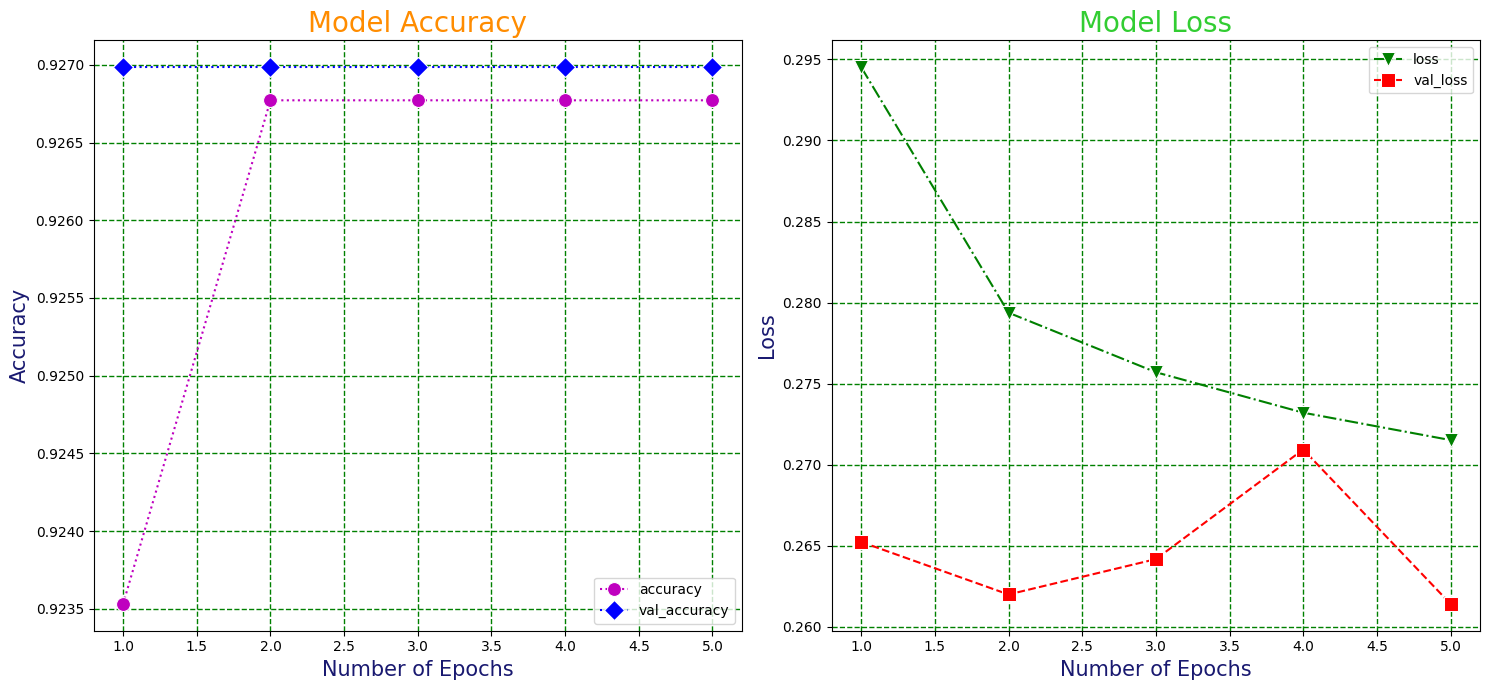

In [ ]:
model_loss_and_accuracy(history)

##### F1 Score

In [ ]:
from sklearn.metrics import f1_score

def plot_f1_score(history):
    f1_scores = []
    for epoch in range(len(history.history['val_loss'])):
        model.set_weights(history.model.get_weights())
        predictions = model.predict([X_test_input, test_mask])
        predictions = [round(p[0]) for p in predictions]
        f1_scores.append(f1_score(Y_test_label, predictions, average='weighted'))

    # Create Seaborn line plot for F1 score
    plt.figure(figsize=(10,10))
    sns.lineplot(x=range(len(history.history['val_loss'])), y=f1_scores, label='F1 score', marker="*", color="g", linestyle="--", linewidth=4, markersize=8, markerfacecolor="r")
    plt.title("F1 Score", color="black", fontsize=20)
    plt.xlabel('Epochs', fontsize=15, color="black")
    plt.ylabel('F1 score', fontsize=15, color="black")
    plt.legend()
    plt.show()

152/152 [==============================] - 40s 262ms/step


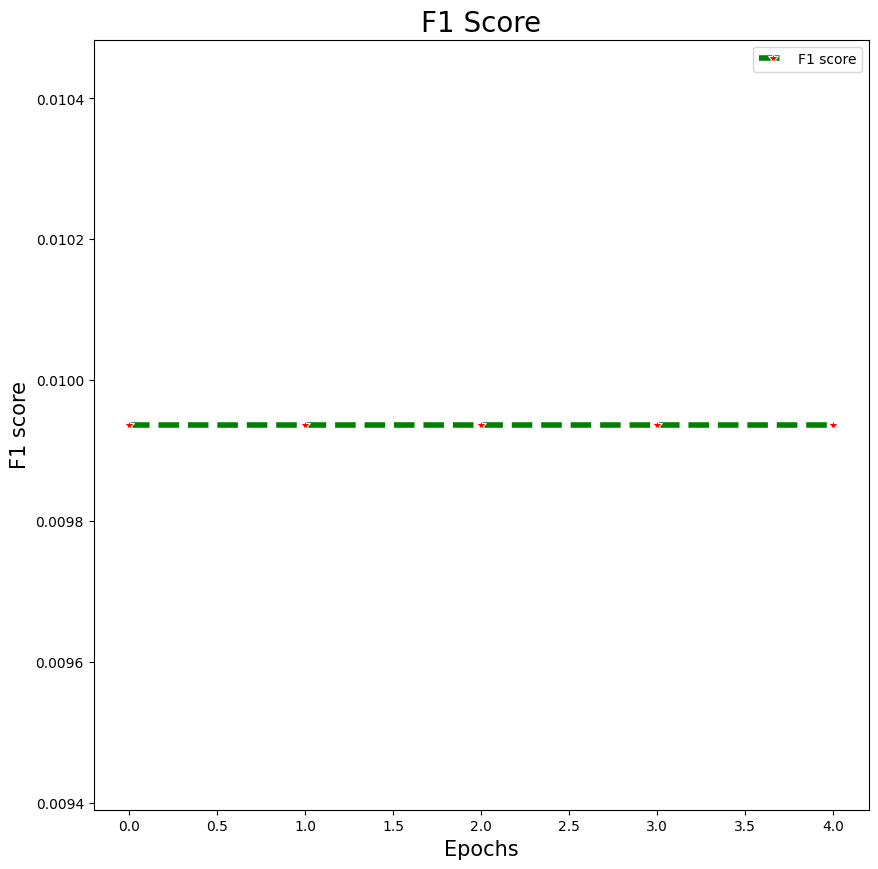

In [ ]:
plot_f1_score(history)

### 6. Prediction

In [ ]:

from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import accuracy_score, average_precision_score

In [ ]:
label_name=["Positive","Racist and Sexist"]
pred=model.predict([X_test_input, test_mask])
prediction=np.argmax(pred, axis=1)

152/152 [==============================] - 40s 262ms/step


##### Accuracy Score

In [ ]:
print("Accuracy Score is",accuracy_score(Y_test_label,prediction))

Accuracy Score is 0.9269847799259564


##### ROC AUC Score

In [ ]:
print("ROC AUC Score is {}".format(roc_auc_score(Y_test_label, pred[:,1])))

ROC AUC Score is 0.49448901083447655


##### Average Precision Score

In [ ]:
# Get the predicted probabilities for the positive class
pred_probs = model.predict([X_test_input, test_mask])[:,1]

# Binarize the test labels
Y_test_binarized = (Y_test_label == 1).astype(int)

# Calculate the average precision score
average_precision = average_precision_score(Y_test_binarized, pred_probs)

print("Average Precision Score :", average_precision)

152/152 [==============================] - 40s 262ms/step
Average Precision Score : 0.07236344038910211


##### Precision and Recall

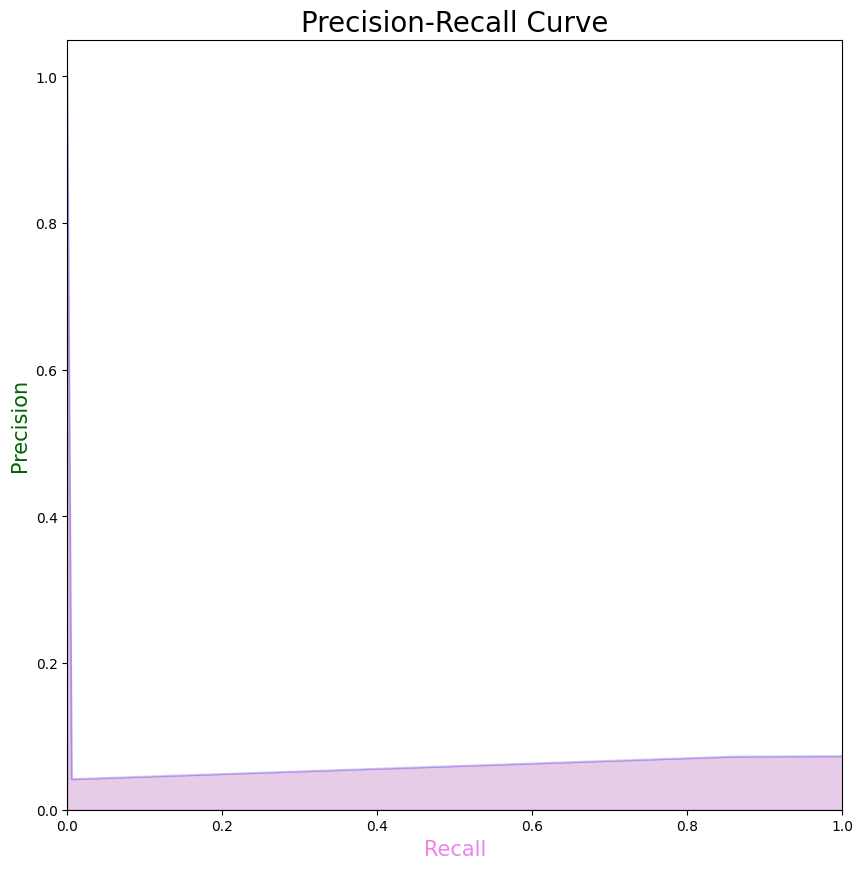

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test_label, pred[:,1])

# Plot the PR curve using Matplotlib's fill_between function
plt.figure(figsize=(10,10))
sns.lineplot(x=recall, y=precision, color='b', alpha=0.2)
plt.fill_between(recall, precision, alpha=0.2, color="darkmagenta")
plt.xlabel('Recall', fontsize=15, color="violet")
plt.ylabel('Precision', fontsize=15, color="darkgreen")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve', fontsize=20, color="black")
plt.show()

##### Confusion Matrix

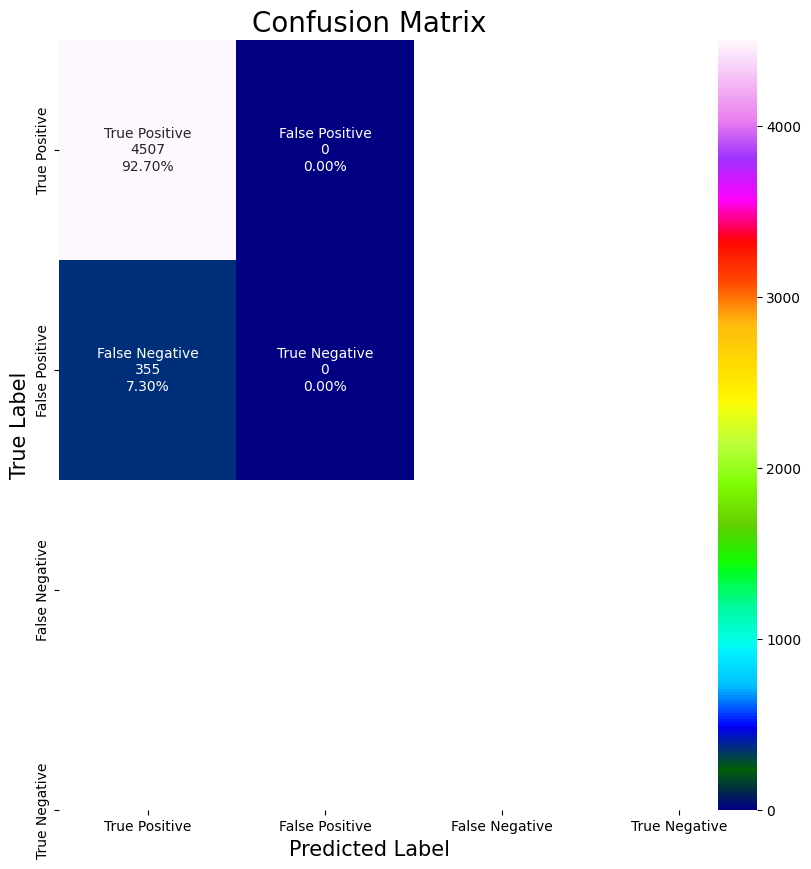

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Y_test_label, prediction)

# Define labels for each cell in the heatmap
label_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
label_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label_names = ["True Positive", "False Positive", "False Negative", "True Negative"]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(label_names, label_counts, label_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='gist_ncar', xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix", color="black", fontsize=20)
plt.ylabel("True Label", fontsize=15, color="black")
plt.xlabel("Predicted Label", fontsize=15, color="black")
plt.show()

##### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_label,prediction,target_names=label_name))

                   precision    recall  f1-score   support

         Positive       0.93      1.00      0.96      4507
Racist and Sexist       0.00      0.00      0.00       355

         accuracy                           0.93      4862
        macro avg       0.46      0.50      0.48      4862
     weighted avg       0.86      0.93      0.89      4862



### 7. Custom Data Prediction

In [ ]:
sample_text = "Thank you very much for sharing your experience with us.We are really happy that your interaction with our brand was so positive.I just want to let you know that we are acting upon your feedback to make some vital changes to the way we operate [list of changes].As you can see, the opinions of our clients help us to provide better experiences and grow as a company.Regards,"
pred_input = roberta_tokenizer.encode_plus(sample_text, add_special_tokens = True, max_length =128, pad_to_max_length = True, truncation=True)
test_input_id = np.array(pred_input['input_ids'])
test_input_mask = np.array(pred_input['attention_mask'])

# Get the predicted probabilities
text_predict = model.predict([test_input_id.reshape(1,-1), test_input_mask.reshape(1,-1)])

# Get the class with the highest probability
predicted_class = np.argmax(text_predict, axis=-1)[0]

# Check if the input is toxic (1) or positive (0)
if predicted_class == 1:
    print("The input text is toxic.")
else:
    print("The input text is positive.")

1/1 [==============================] - 0s 77ms/step
The input text is positive.


## Conclusion

In this project, we analyzed a large dataset of tweets categorized by sentiment
labels. We explored various natural language processing techniques, including preprocessing, tokenization, and sentiment analysis. Through data visualization, we gained insights into the distribution of sentiment categories and the most common hashtags associated with each sentiment. Additionally, we implemented machine learning models, leveraging state-of-the-art transformer-based architectures like RoBERTa, to classify tweet sentiments. The training process, although time-consuming, benefited from GPU acceleration and optimization strategies. Overall, this project demonstrates the application of advanced NLP techniques and deep learning models in sentiment analysis tasks, offering valuable insights into public opinion and social media trends.

## Model Deployment

In [ ]:
import pickle

# Save the trained model as a pickle file
with open('roberta_model.pkl', 'wb') as file:
    pickle.dump(model, file)